## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Dataset

In [2]:
zomato = pd.read_csv('zomato.csv', encoding='latin1')
country_code = pd.read_excel('Country-Code.xlsx')

In [24]:
zomato.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [25]:
country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


## Export Data

In [ ]:
with pd.ExcelWriter('zomato.xlsx') as writer:
    zomato.to_excel(writer, sheet_name='Zomato', index=False)
    country_code.to_excel(writer, sheet_name='Country_Code', index=False)

# 🧹 **Part 1: Data Cleaning & Preprocessing**
### _Handling missing values, correcting data, and preparing for analysis_

## 📋 Table: **Country_Code**

- `Country` column should be **merged or linked contextually**, not exist independently  
  🏷️ **Issue Type:** `Structure`

## 📋 Table: **zomato**

➤ Some Average Cost for two have **zeros**  
   🏷️ **Issue Type:** `Validity`

➤ Some missing values in **Cuisines** column <br>
🏷️ **Issue Type:** `Completeness`

In [3]:
zomato = pd.merge(zomato, country_code, how='left', on='Country Code')

In [7]:
zomato.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


# Observation

Merge both the tables

In [29]:
zomato[zomato.isnull().any(axis=1)][['Restaurant Name', 'Country Code', 'City', 'Cuisines', 'Average Cost for two']]

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two
84,Cookie Shoppe,216,Albany,NaN,0
87,Pearly's Famous Country Cookng,216,Albany,NaN,0
94,Jimmie's Hot Dogs,216,Albany,NaN,10
297,Corkscrew Cafe,216,Gainesville,NaN,40
328,Dovetail,216,Macon,NaN,40
346,HI Lite Bar & Lounge,216,Miller,NaN,0
368,Hillstone,216,Orlando,NaN,40
418,Leonard's Bakery,216,Rest of Hawaii,NaN,10
455,Tybee Island Social Club,216,Savannah,NaN,10


In [4]:
zomato = zomato.dropna(subset=['Cuisines'])

## Observation
Delete Missing values from Cuisines Column

In [5]:
zomato['Average Cost for two'] = zomato['Average Cost for two'].replace(0, np.nan)


In [6]:
city_mean = zomato.groupby('City')['Average Cost for two'].mean()

In [7]:
zomato['Average Cost for two'] = zomato.apply(
    lambda row: city_mean[row['City']] if pd.isna(row['Average Cost for two']) else row['Average Cost for two'],
    axis=1
)

## Observation
Replaced all 0 values in Average Cost for two with the city‑wise mean.
0 is unrealistic for restaurant cost, and filling with city average maintains realistic pricing.

## Export Data

In [35]:

with pd.ExcelWriter('zomato_data.xlsx') as writer:
    zomato.to_excel(writer, sheet_name='Zomato', index=False)
    

# 📊 **Part 2: Exploratory Data Analysis**
### _Understanding the dataset through trends, patterns, and visual insights_

## **Top 3 Countries with Maximum Restaurants**
#### _Countries dominating the Zomato dataset_

In [8]:
country = zomato['Country'].value_counts().sort_values(ascending=False).reset_index().head(3)
country

,Country,count
0,India,8652
1,United States,425
2,United Kingdom,80


<Figure size 1200x1000 with 0 Axes>

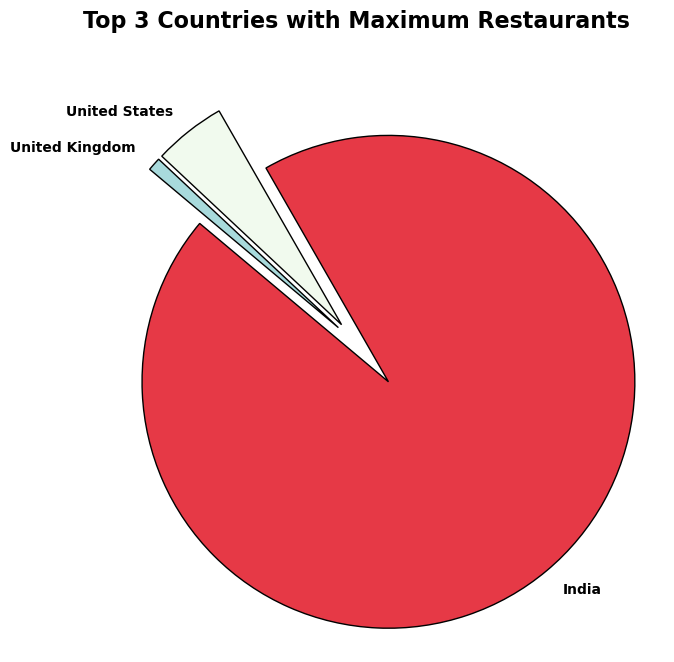

In [37]:

colors = ['#E63946', '#F1FAEE', '#A8DADC']  
plt.figure(figsize=(10, 8))
plt.pie(
    country['count'],
    labels=country['Country'],
    explode=[0.2, 0.1, 0.1],
    wedgeprops={'edgecolor': 'black'},
    startangle=140,
    textprops={'fontsize':10, 'fontweight':'bold', 'color':'black'},  # style labels
    colors=colors
)
plt.title("Top 3 Countries with Maximum Restaurants", fontsize=16, fontweight='bold', color="black")
plt.show()

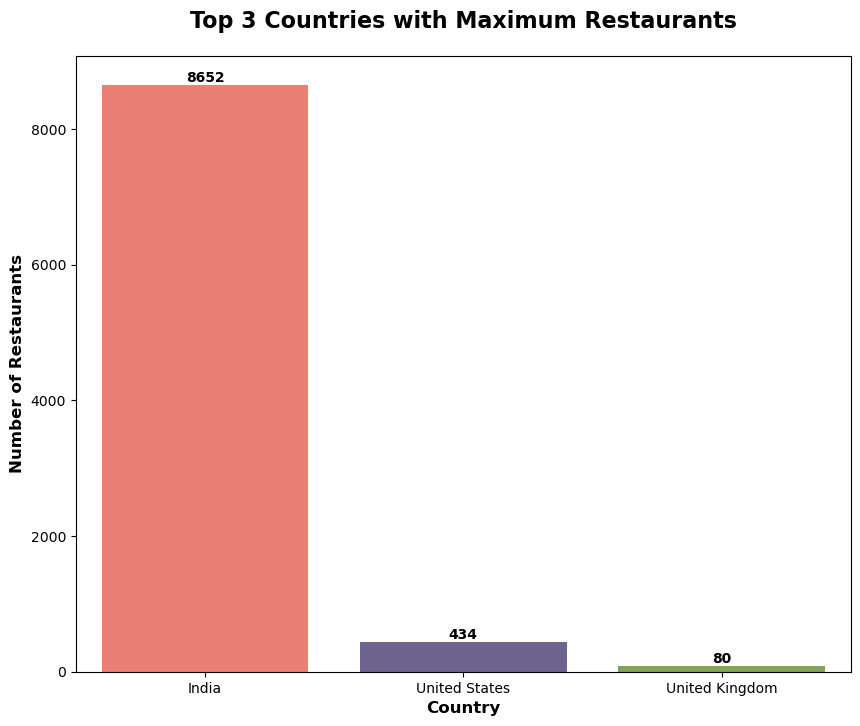

In [38]:
colors = ['#FF6F61', '#6B5B95', '#88B04B']
plt.figure(figsize=(10,8))
ax = sns.barplot(x=country['Country'], y=country['count'], palette=colors, hue=country['Country'])
for container in ax.containers:
    ax.bar_label(container,fontsize=10, fontweight='bold')

plt.xlabel("Country", fontsize=12, fontweight='bold')
plt.ylabel("Number of Restaurants", fontsize=12, fontweight='bold')
plt.title("Top 3 Countries with Maximum Restaurants", fontsize=16, fontweight='bold', color="black", pad=20)
plt.show()

## Observation
India has the highest number of Zomato users compared to other countries. This shows that most people who use Zomato are from India, while users from other countries are much fewer.

In [16]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [9]:
rating = zomato.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
rating

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation
1. When rating is between 4.5 to 4.9 ----> Excellent  
2. When rating is between 4.0 to 4.4 ----> Very Good  
3. When rating is between 3.5 to 3.9 ----> Good  
4. When rating is between 2.5 to 3.4 ----> Average  
5. When rating is between 1.0 to 2.4 ----> Poor  
6. When rating is 0.0 -------------------> Not rated

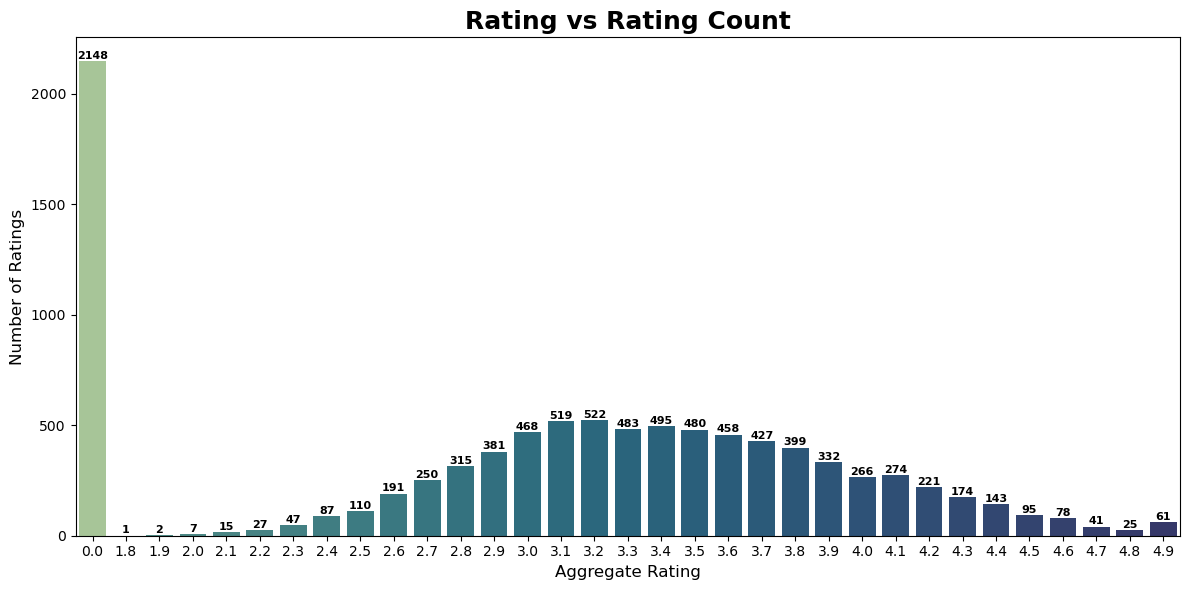

In [13]:

plt.figure(figsize=(12,6))
sns.barplot(data=rating, x='Aggregate rating', y='Rating Count', 
            hue='Aggregate rating', palette='crest', legend=False)

for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().text(
        bar.get_x() + bar.get_width()/2, 
        height + 10, 
        int(height), 
        ha='center', 
        fontsize=8, 
        color='black',
        fontweight='semibold'
    )

plt.title('Rating vs Rating Count', fontweight='bold', fontsize=18)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

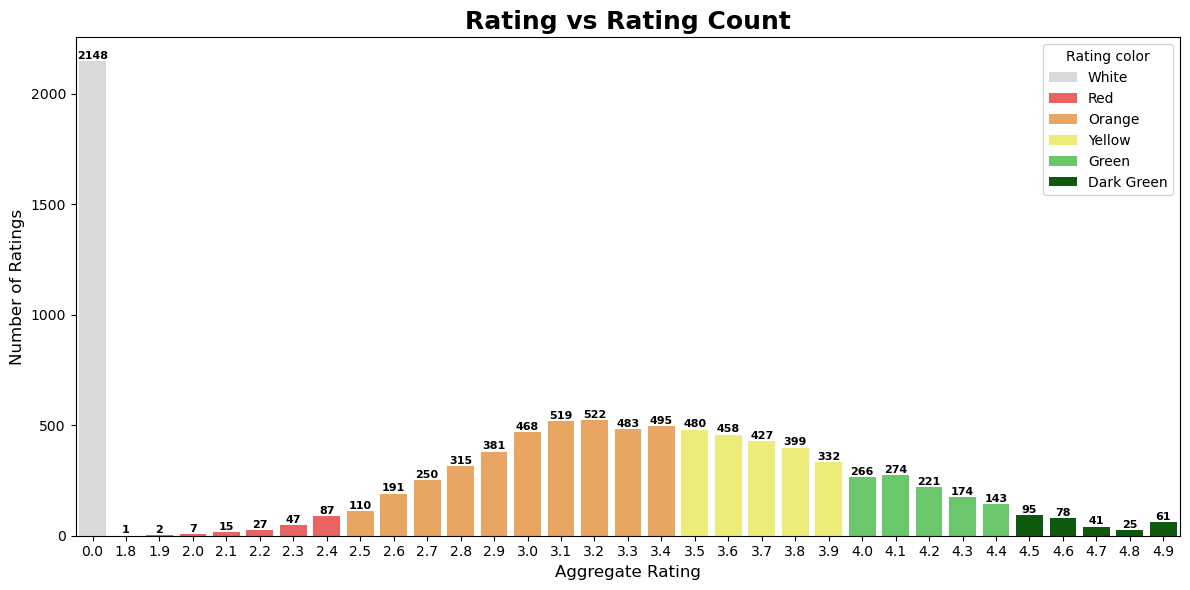

In [42]:

custom_palette = {
    'White': '#d9d9d9',
    'Red': '#ff4d4d',
    'Orange': '#ffa64d',
    'Yellow': '#ffff66',
    'Green': '#5cd65c',
    'Dark Green': '#006600'
}

plt.figure(figsize=(12,6))

sns.barplot(
    data=rating,
    x='Aggregate rating',
    y='Rating Count',
    hue='Rating color',
    palette=custom_palette
)

for bar in plt.gca().patches:
    height = bar.get_height()
    if height > 0:
        plt.gca().text(
            bar.get_x() + bar.get_width()/2, 
            height + 10, 
            int(height), 
            ha='center', 
            fontsize=8, 
            color='black',
            fontweight='semibold'
        )

plt.title('Rating vs Rating Count', fontweight='bold', fontsize=18)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


## Observation
1. Not Rated Count is very high
2. Maximum number of rating between 2.5 to 3.4

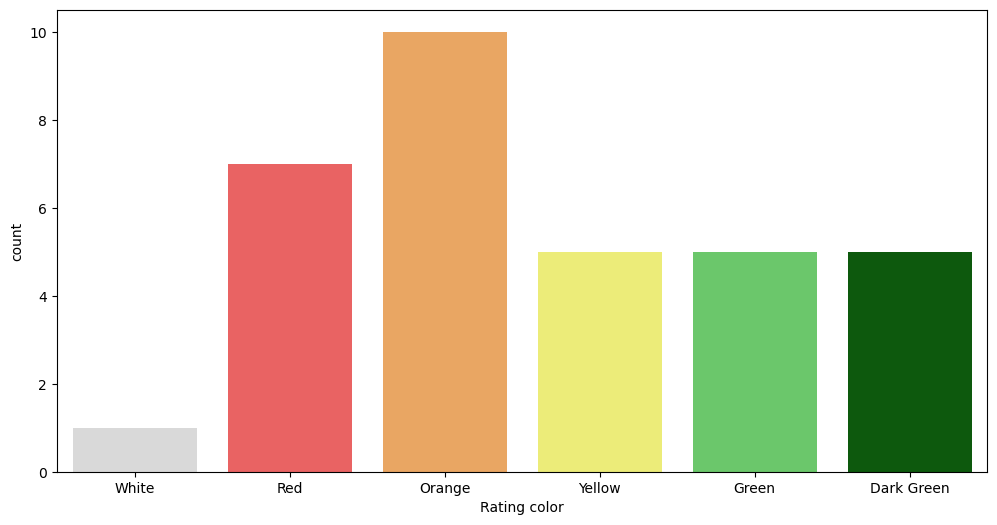

In [43]:
plt.figure(figsize=(12,6))

custom_palette = {
    'White': '#d9d9d9',
    'Red': '#ff4d4d',
    'Orange': '#ffa64d',
    'Yellow': '#ffff66',
    'Green': '#5cd65c',
    'Dark Green': '#006600'
}

sns.countplot(rating, x='Rating color',palette=custom_palette, hue='Rating color')
plt.show()

In [45]:
# Find the countries name that has given 0 rating
zomato.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [46]:
zero_rating = zomato[zomato['Aggregate rating'] == 0]
zero_rating.groupby('Country').size().reset_index().rename(columns={0: 'Count of Zero Ratings'})

,Country,Count of Zero Ratings
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


## Observation
Most of the restaurants that have a 0 rating in the dataset are from India. This means that Indian customers have given the highest number of zero ratings compared to other countries.

In [47]:
# Find out which currency is used by which Country
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [48]:
currency = zomato[['Country','Currency']].drop_duplicates().reset_index(drop=True)
currency

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,United States,Dollar($)
3,Australia,Dollar($)
4,Canada,Dollar($)
5,Singapore,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


In [49]:
# Which Countries do have online deliveries
zomato.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [50]:
online_delivery = zomato[zomato['Has Online delivery'] == 'Yes']
online_delivery[['Country']].drop_duplicates().reset_index(drop=True)

,Country
0,UAE
1,India


## Observation
Only 2 countries have restaurants that offer online delivery.

## **Top 4 Cities with Maximum Restaurants**
#### _Cities dominating the Zomato restaurant dataset_

In [ ]:

city_counts = zomato['City'].value_counts().head(4)

colors = ['#E63946', '#F1FAEE', '#A8DADC','#457B9D']  
plt.figure(figsize=(12, 10))

plt.pie(
    city_counts.values,
    labels=city_counts.index,
    explode=[0.05, 0.02, 0.02, 0.02],
    wedgeprops={'edgecolor': 'black'},
    startangle=180,
    autopct='%.1f%%',
    colors=colors
)
plt.title("Top 4 Cities by Number of Restaurants")
plt.show()

## **Top 12 Cuisines Offered by Restaurants**
#### _Most popular food categories in the Zomato dataset_

In [54]:
zomato['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9542, dtype: object

In [23]:
cuisine_data = zomato['Cuisines']
split_cuisines = cuisine_data.str.split(',')
all_cuisines = [cuisine.strip() for sublist in split_cuisines for cuisine in sublist]
top_cuisines = pd.Series(all_cuisines).value_counts().head(12)
top_cuisines

North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Street Food      562
American         390
Name: count, dtype: int64

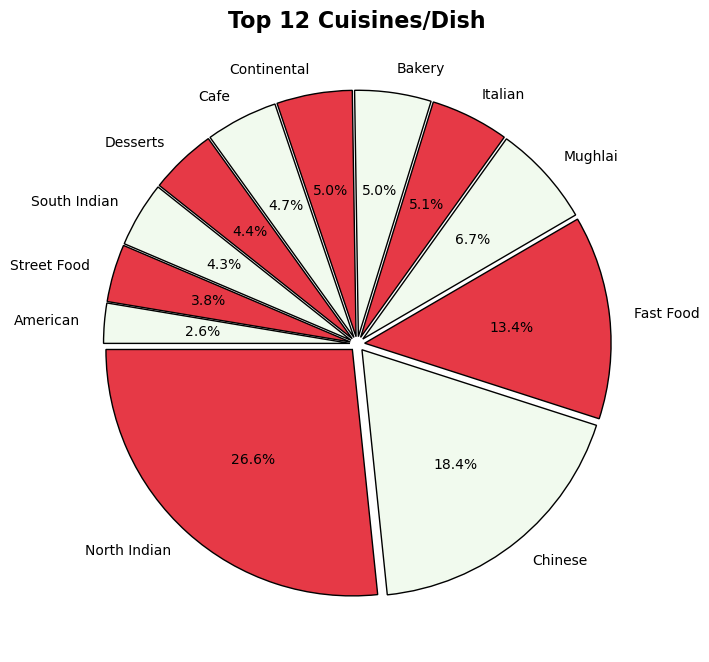

In [24]:

color1 = '#E63946'
color2 = '#F1FAEE'  
colors = [color1, color2] * 6

plt.figure(figsize=(12, 8))

plt.pie(
    top_cuisines.values,
    labels=top_cuisines.index,
    explode = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03],
    wedgeprops={'edgecolor': 'black'},
    startangle=180,
    autopct='%.1f%%',
    colors=colors
)
plt.title("Top 12 Cuisines/Dish", fontsize=16, fontweight='semibold')
plt.show()

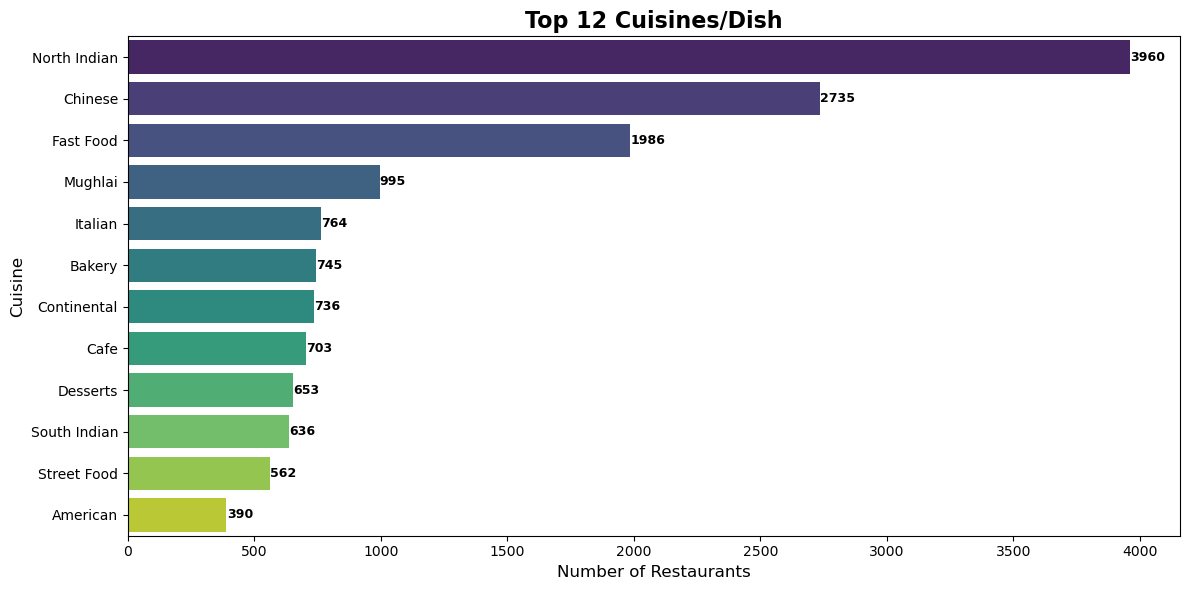

In [28]:
plt.figure(figsize=(12,6))

sns.barplot(
    x=top_cuisines.values,
    y=top_cuisines.index,
    palette='viridis',
    hue=top_cuisines.index
)

for index, value in enumerate(top_cuisines.values):
    plt.text(value + 1, index, str(value), va='center', fontsize=9, fontweight='semibold')

plt.title('Top 12 Cuisines/Dish', fontsize=16, fontweight='semibold')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


# Observation
Top 3 most ordered cuisines are North Indian, Chinese, and Fast Food.

## **Top Localities by Number of Restaurants**
#### _Areas with the highest concentration of restaurants_


In [79]:
verbose = zomato['Locality Verbose'].value_counts().reset_index().head(10)
verbose

,Locality Verbose,count
0,"Connaught Place, New Delhi",122
1,"Rajouri Garden, New Delhi",99
2,"Shahdara, New Delhi",87
3,"Defence Colony, New Delhi",86
4,"Pitampura, New Delhi",85
5,"Malviya Nagar, New Delhi",84
6,"Mayur Vihar Phase 1, New Delhi",84
7,"Rajinder Nagar, New Delhi",81
8,"Safdarjung, New Delhi",80
9,"Satyaniketan, New Delhi",79


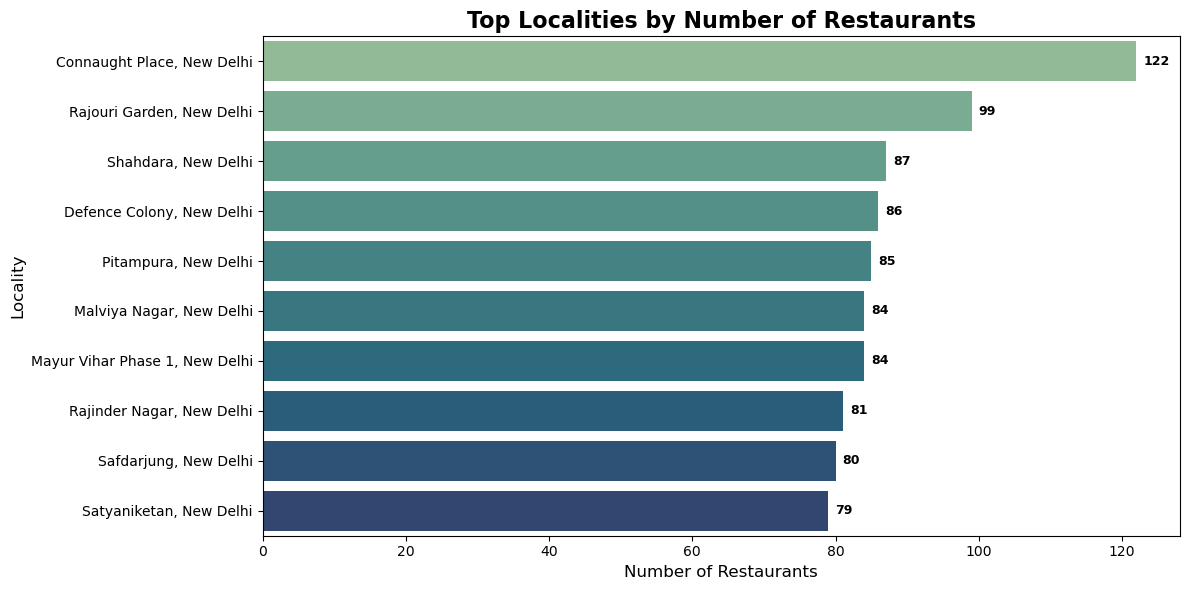

In [86]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=verbose,
    x='count',
    y='Locality Verbose',
    hue='Locality Verbose',
    palette='crest'
)

for index, value in enumerate(verbose['count']):
    plt.text(value + 1, index, str(value), va='center', fontsize=9, fontweight='semibold')

plt.title('Top Localities by Number of Restaurants', fontweight='bold', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Locality', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## ** TOP 10 Restaurants - Rating vs Votes**
#### _Comparing customer satisfaction and popularity across restaurants_

In [46]:
temp = zomato.groupby('Restaurant Name')[['Aggregate rating', 'Votes']].mean().sort_values(by='Aggregate rating',ascending=False).head(10)
temp

,Aggregate rating,Votes
Restaurant Name,,
Sheroes Hangout,4.9,77.0
Yellow Dog Eats,4.9,1252.0
Miann,4.9,281.0
Milse,4.9,754.0
Grandson of Tunday Kababi,4.9,1057.0
Spiral - Sofitel Philippine Plaza Manila,4.9,621.0
Solita,4.9,162.0
Shorts Burger and Shine,4.9,820.0
Ministry of Crab,4.9,203.0


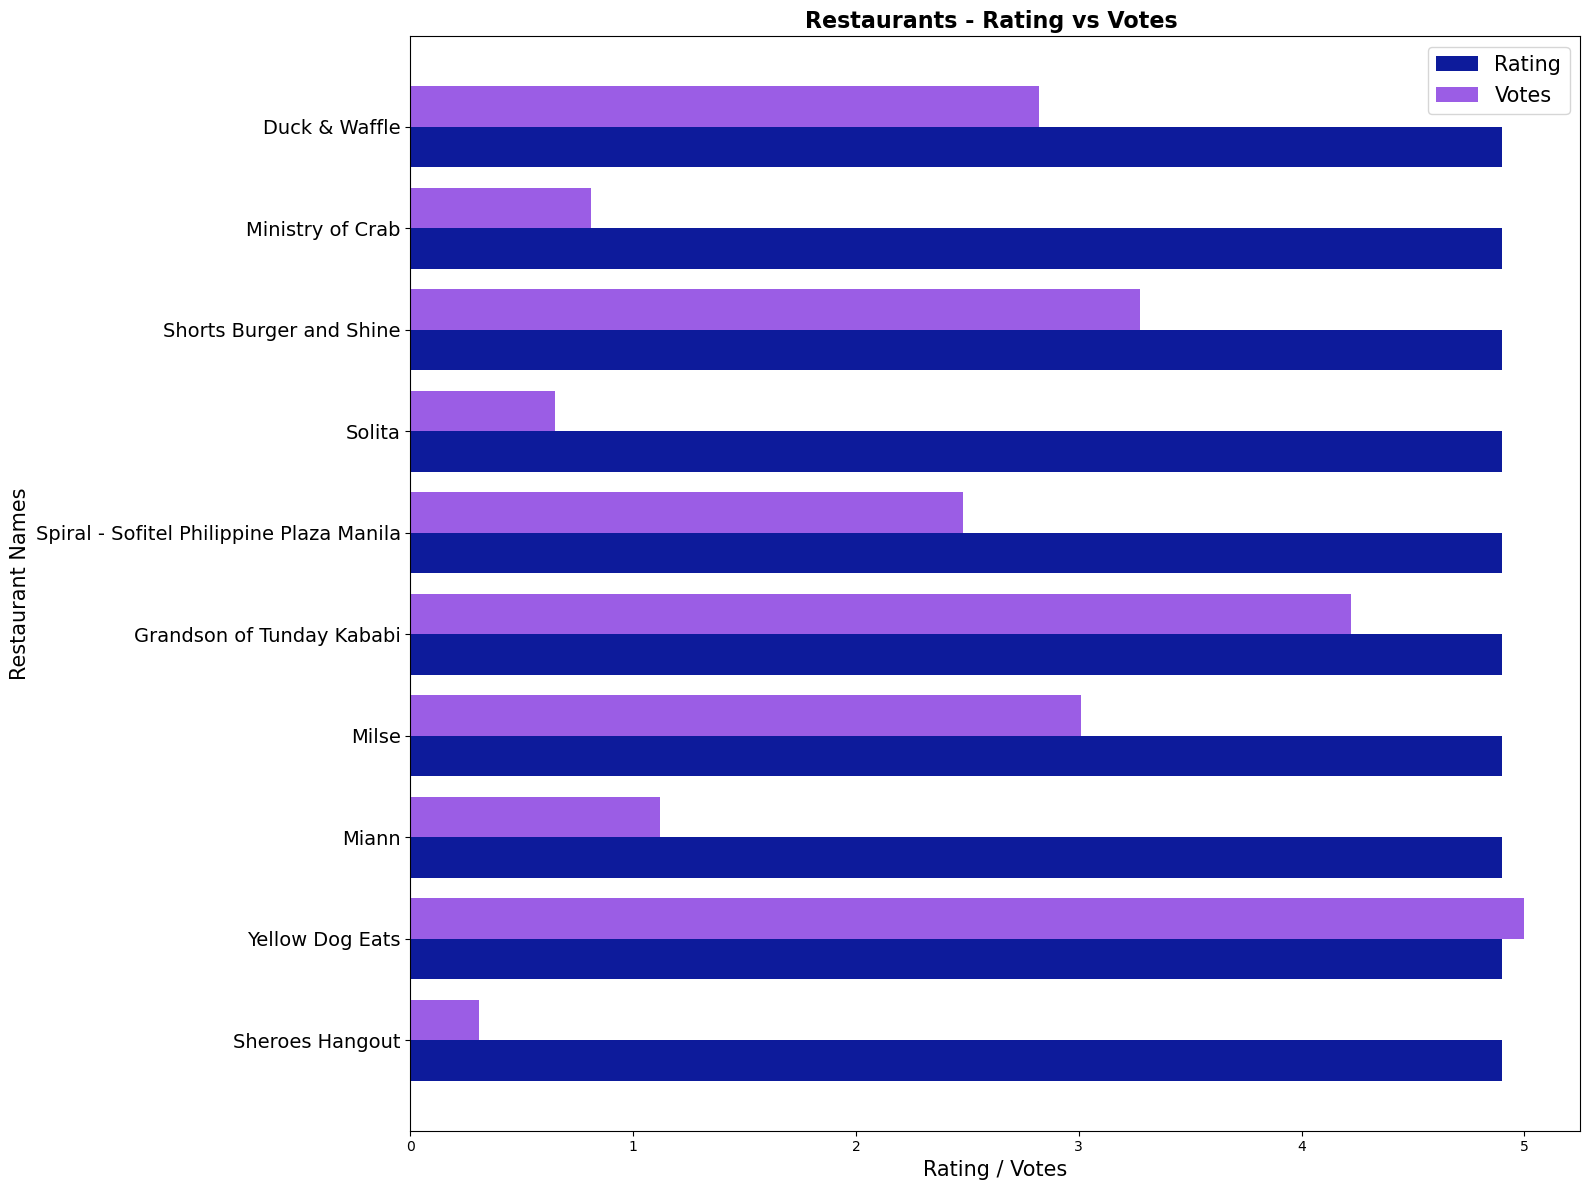

In [75]:
x = np.arange(len(temp))  
height = 0.4    

plt.figure(figsize=(16, 12))
# Rating bars 
plt.barh(x - height/2, temp['Aggregate rating'], height, label='Rating', color='#0D1B9B')

# Votes bars (scaled to 0-5 for comparison
plt.barh(x + height/2, temp['Votes'] / temp['Votes'].max() * 5, height, label='Votes', color='#9B5DE5')

plt.yticks(x, temp.index, fontsize=14)

plt.xlabel('Rating / Votes', fontsize=15)
plt.ylabel('Restaurant Names',fontsize=15)
plt.title('Restaurants - Rating vs Votes ', fontsize=16, fontweight='bold')
plt.legend(
    fontsize=15, 
    frameon=True, 
)
plt.tight_layout()
plt.show()